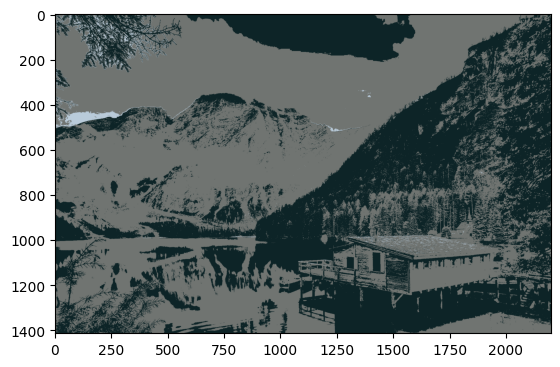

In [2]:
import PIL
import matplotlib.pyplot as plt
import numpy as np


def read_pic():
    directory = input("Enter the directory path:")
    check = directory.split(".")
    if (check[1] != "jpg" and check[1] != "png"):
        print('Wrong input')
        return
    else:
        img = PIL.Image.open(directory)
        img = np.array(img)
        return img

def img_reshape(img) :
    if len(img.shape) == 2 :
        return img.reshape(img.shape[0]*img.shape[1],1)
    if len(img.shape) == 3 :
        return img.reshape(img.shape[0]*img.shape[1], img.shape[2])
    
def input_kmeans():
    inp = int(input("Enter the number of cluster : \n1.3\n2.5\n3.7\n"))
    k_cluster, max_iter = 0,0
    while (True):
        if inp == 1:
            k_cluster = 3
            break
        if inp == 2:
            k_cluster = 5
            break
        if inp == 3:
            k_cluster = 7
            break
        else:
            inp = int(input("Wrong input.Enter the number of cluster : \n1.3\n2.5\n3.7\n"))

    max_iter = int(input("Enter the maximum number of iteration : "))
    tp = 'random'
    inp = int(input("Enter the type of initializing centroids : \n1.random\n2.in_pixels\n"))
    while (True):
        if inp == 1:
            tp = 'random'
            break
        if inp == 2:
            tp = 'in_pixels'
            break
        else:
            inp = int(input("Wrong input.Enter the type of initializing centroids : \n1.random\n2.in_pixels\n"))
    return k_cluster, max_iter, tp


def initialize_centroids(img_1d, k_clusters, init_centroids='random'):
    if init_centroids == 'in_pixels':
        return img_1d[np.random.choice(img_1d.shape[0], k_clusters, replace= False)]
    else:
        centroids = np.random.choice(256, size=(k_clusters, img_1d.shape[1]),replace=False)
    return centroids

def update_centroids(img_1d,k_cluster,labels,centroids):
    for k in range(k_cluster):
        cluster_k = img_1d[labels == k]
        if len(cluster_k) :
            centroids[k] = np.mean(cluster_k, axis = 0)
    return np.array(centroids)

def find_label(img_1d, centroids):
    dist_matrix = np.linalg.norm(img_1d - centroids[0], axis=1)
    dist_matrix = dist_matrix.reshape((img_1d.shape[0], 1))
    for i in range(1,centroids.shape[0]):
        dist = np.linalg.norm(img_1d - centroids[i], axis=1)
        dist = dist.reshape((img_1d.shape[0], 1))
        dist_matrix = np.concatenate((dist_matrix,dist),axis=1)
    return np.argmin(dist_matrix,axis = 1)

def check(cur_centroids, new_centroids):
    threshold = 1
    return np.allclose(cur_centroids, new_centroids, atol=threshold, equal_nan=True)


def k_means(img_1d, k_clusters, max_iter, init_centroids='random'):
    # step 1 : initialize k centroids
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids)
    for _ in range(max_iter):
        # step 2 : find label for each pixel
        labels = find_label(img_1d,centroids)
        # step 3 : find new centroids
        new_centroids = update_centroids(img_1d, k_clusters, labels, centroids)
        # step 4 : check changes in label
        if check(centroids, new_centroids):
            break
        # step 5 : update centroids
        centroids = new_centroids
    return labels, centroids





def compress_color(img_1d, k_clusters, labels, centroids,img):
    for k in range(k_clusters):
        img_1d[labels == k] = centroids[k]
    if len(img.shape) == 3 :
        return img_1d.reshape(img.shape[0], img.shape[1], img.shape[2])
    if len(img.shape) == 2 :
        return img_1d.reshape(img.shape[0], img.shape[1])


def show_img(img):
    img = PIL.Image.fromarray(img)
    plt.imshow(img)
    plt.show()


def save_pic(img):
    filetype = (input("Enter the type of picture : \n1.png\n2.jpg"))
    while filetype != "png" and filetype != "jpg":
        filetype = (input("Wrong type .Enter the type of picture : \n1.png\n2.jpg"))
    name = input("Enter the name of picture : ")
    name = name + "." + filetype
    img = PIL.Image.fromarray(img)
    img.save(name)




if __name__ == "__main__":
    img  = read_pic()
    img_1d = img_reshape(img)
    k_cluster, max_iter, tp = input_kmeans()
    labels, centroids = k_means(img_1d, k_cluster, max_iter,tp)
    new_img = compress_color(img_1d,k_cluster, labels, centroids,img)
    show_img(new_img)
    save_pic(new_img)










